# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [83]:
#pip install colorama

In [1]:
#pip install easygui

In [2]:
#pip install xgboost

In [3]:
#pip install catboost

In [4]:
#importing required libraries
import gradio as gr
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [5]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [6]:
#Shape of dataframe

data.shape

(11054, 32)

In [7]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [8]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [9]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [10]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [11]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

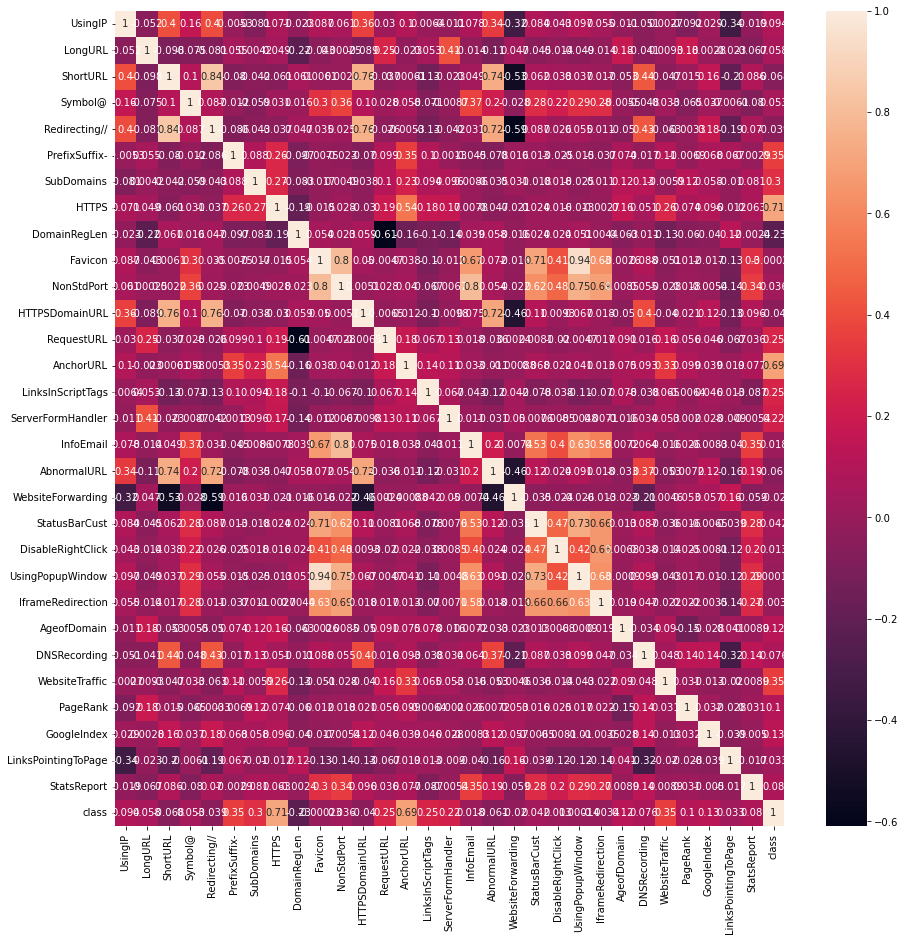

In [12]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

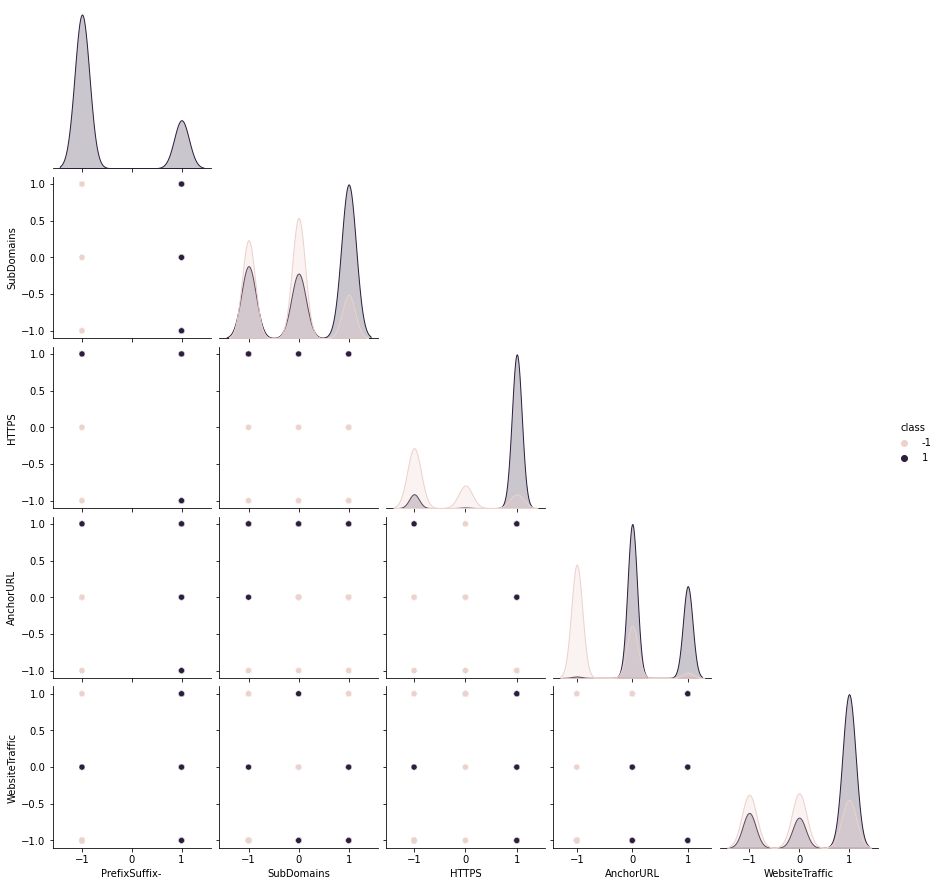

In [13]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


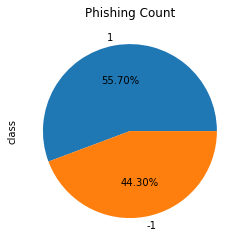

In [14]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [15]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [17]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [18]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [19]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [20]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [21]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [22]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [23]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [25]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [26]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



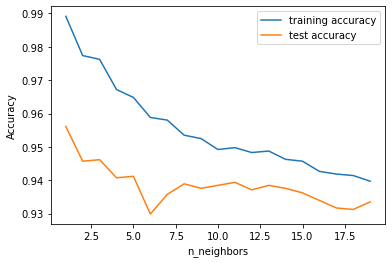

In [27]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [28]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [29]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [30]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [31]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [32]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [33]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [34]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [35]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [36]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [37]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [39]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [40]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [41]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.963

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.966


In [42]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



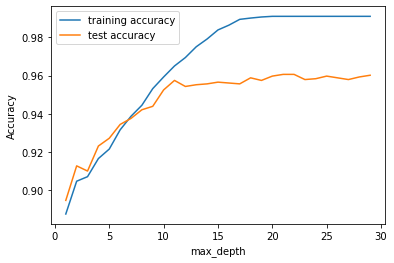

In [43]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [44]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [45]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [47]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.968

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.988
Random Forest : precision on test Data: 0.966


In [48]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



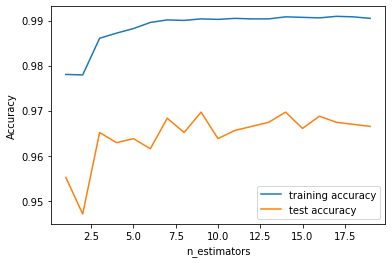

In [49]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [50]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [51]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [52]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [53]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [54]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



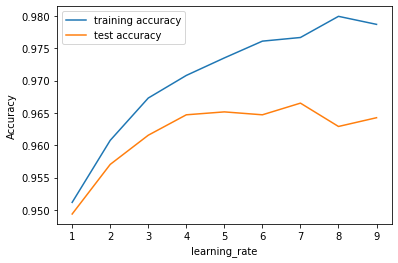

In [55]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

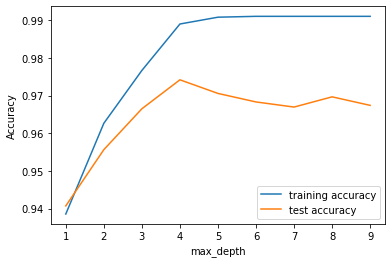

In [56]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [57]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [58]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 167ms	remaining: 2m 46s
1:	learn: 0.4349357	total: 171ms	remaining: 1m 25s
2:	learn: 0.3609236	total: 175ms	remaining: 58.2s
3:	learn: 0.3050829	total: 179ms	remaining: 44.6s
4:	learn: 0.2766620	total: 184ms	remaining: 36.6s
5:	learn: 0.2475476	total: 188ms	remaining: 31.1s
6:	learn: 0.2286637	total: 191ms	remaining: 27.1s
7:	learn: 0.2138754	total: 195ms	remaining: 24.2s
8:	learn: 0.2013643	total: 199ms	remaining: 21.9s
9:	learn: 0.1896378	total: 202ms	remaining: 20s
10:	learn: 0.1819539	total: 206ms	remaining: 18.5s
11:	learn: 0.1767867	total: 210ms	remaining: 17.3s
12:	learn: 0.1727735	total: 214ms	remaining: 16.2s
13:	learn: 0.1682578	total: 218ms	remaining: 15.3s
14:	learn: 0.1641759	total: 221ms	remaining: 14.5s
15:	learn: 0.1614218	total: 225ms	remaining: 13.9s
16:	learn: 0.1558968	total: 229ms	remaining: 13.3s
17:	learn: 0.1535881	total: 233ms	remaining: 12.7s
18:	learn: 0.1514228	total: 237ms	remaining: 12.2s
19:	learn: 0.1482580	total: 242ms	remaini

168:	learn: 0.0546642	total: 890ms	remaining: 4.37s
169:	learn: 0.0543574	total: 894ms	remaining: 4.37s
170:	learn: 0.0542539	total: 899ms	remaining: 4.36s
171:	learn: 0.0540977	total: 904ms	remaining: 4.35s
172:	learn: 0.0539741	total: 908ms	remaining: 4.34s
173:	learn: 0.0537793	total: 913ms	remaining: 4.33s
174:	learn: 0.0535499	total: 918ms	remaining: 4.33s
175:	learn: 0.0533461	total: 922ms	remaining: 4.32s
176:	learn: 0.0531326	total: 927ms	remaining: 4.31s
177:	learn: 0.0530595	total: 932ms	remaining: 4.3s
178:	learn: 0.0529470	total: 936ms	remaining: 4.29s
179:	learn: 0.0527691	total: 941ms	remaining: 4.29s
180:	learn: 0.0526404	total: 945ms	remaining: 4.28s
181:	learn: 0.0525145	total: 950ms	remaining: 4.27s
182:	learn: 0.0524332	total: 954ms	remaining: 4.26s
183:	learn: 0.0522311	total: 959ms	remaining: 4.25s
184:	learn: 0.0519353	total: 964ms	remaining: 4.25s
185:	learn: 0.0515714	total: 969ms	remaining: 4.24s
186:	learn: 0.0514909	total: 974ms	remaining: 4.23s
187:	learn: 0

357:	learn: 0.0343870	total: 1.78s	remaining: 3.2s
358:	learn: 0.0343532	total: 1.79s	remaining: 3.2s
359:	learn: 0.0342877	total: 1.79s	remaining: 3.19s
360:	learn: 0.0341769	total: 1.8s	remaining: 3.19s
361:	learn: 0.0341559	total: 1.8s	remaining: 3.18s
362:	learn: 0.0340802	total: 1.81s	remaining: 3.17s
363:	learn: 0.0340117	total: 1.81s	remaining: 3.17s
364:	learn: 0.0339431	total: 1.82s	remaining: 3.16s
365:	learn: 0.0338809	total: 1.82s	remaining: 3.16s
366:	learn: 0.0338159	total: 1.83s	remaining: 3.15s
367:	learn: 0.0337862	total: 1.83s	remaining: 3.15s
368:	learn: 0.0337620	total: 1.84s	remaining: 3.14s
369:	learn: 0.0337018	total: 1.84s	remaining: 3.14s
370:	learn: 0.0336391	total: 1.85s	remaining: 3.13s
371:	learn: 0.0335537	total: 1.85s	remaining: 3.13s
372:	learn: 0.0335024	total: 1.86s	remaining: 3.12s
373:	learn: 0.0334719	total: 1.86s	remaining: 3.11s
374:	learn: 0.0334368	total: 1.86s	remaining: 3.11s
375:	learn: 0.0333678	total: 1.87s	remaining: 3.1s
376:	learn: 0.033

542:	learn: 0.0275952	total: 2.68s	remaining: 2.25s
543:	learn: 0.0275801	total: 2.68s	remaining: 2.25s
544:	learn: 0.0275523	total: 2.69s	remaining: 2.24s
545:	learn: 0.0275116	total: 2.69s	remaining: 2.24s
546:	learn: 0.0275110	total: 2.69s	remaining: 2.23s
547:	learn: 0.0274838	total: 2.7s	remaining: 2.22s
548:	learn: 0.0274730	total: 2.7s	remaining: 2.22s
549:	learn: 0.0274373	total: 2.71s	remaining: 2.21s
550:	learn: 0.0274372	total: 2.71s	remaining: 2.21s
551:	learn: 0.0274062	total: 2.72s	remaining: 2.2s
552:	learn: 0.0273534	total: 2.72s	remaining: 2.2s
553:	learn: 0.0273206	total: 2.73s	remaining: 2.19s
554:	learn: 0.0273206	total: 2.73s	remaining: 2.19s
555:	learn: 0.0272855	total: 2.73s	remaining: 2.18s
556:	learn: 0.0272855	total: 2.74s	remaining: 2.18s
557:	learn: 0.0272748	total: 2.74s	remaining: 2.17s
558:	learn: 0.0272470	total: 2.75s	remaining: 2.17s
559:	learn: 0.0272083	total: 2.75s	remaining: 2.16s
560:	learn: 0.0271917	total: 2.75s	remaining: 2.15s
561:	learn: 0.02

707:	learn: 0.0253418	total: 3.39s	remaining: 1.4s
708:	learn: 0.0253418	total: 3.39s	remaining: 1.39s
709:	learn: 0.0253417	total: 3.39s	remaining: 1.39s
710:	learn: 0.0253415	total: 3.4s	remaining: 1.38s
711:	learn: 0.0253415	total: 3.4s	remaining: 1.38s
712:	learn: 0.0253414	total: 3.41s	remaining: 1.37s
713:	learn: 0.0253414	total: 3.41s	remaining: 1.37s
714:	learn: 0.0253414	total: 3.41s	remaining: 1.36s
715:	learn: 0.0253414	total: 3.42s	remaining: 1.35s
716:	learn: 0.0253414	total: 3.42s	remaining: 1.35s
717:	learn: 0.0253413	total: 3.42s	remaining: 1.34s
718:	learn: 0.0253413	total: 3.43s	remaining: 1.34s
719:	learn: 0.0253413	total: 3.43s	remaining: 1.33s
720:	learn: 0.0253413	total: 3.44s	remaining: 1.33s
721:	learn: 0.0253299	total: 3.44s	remaining: 1.32s
722:	learn: 0.0253299	total: 3.44s	remaining: 1.32s
723:	learn: 0.0253213	total: 3.45s	remaining: 1.31s
724:	learn: 0.0253213	total: 3.45s	remaining: 1.31s
725:	learn: 0.0253213	total: 3.46s	remaining: 1.3s
726:	learn: 0.02

888:	learn: 0.0247840	total: 4.1s	remaining: 512ms
889:	learn: 0.0247840	total: 4.11s	remaining: 507ms
890:	learn: 0.0247840	total: 4.11s	remaining: 503ms
891:	learn: 0.0247839	total: 4.11s	remaining: 498ms
892:	learn: 0.0247840	total: 4.12s	remaining: 493ms
893:	learn: 0.0247839	total: 4.12s	remaining: 489ms
894:	learn: 0.0247839	total: 4.12s	remaining: 484ms
895:	learn: 0.0247840	total: 4.13s	remaining: 479ms
896:	learn: 0.0247838	total: 4.13s	remaining: 474ms
897:	learn: 0.0247780	total: 4.13s	remaining: 470ms
898:	learn: 0.0247603	total: 4.14s	remaining: 465ms
899:	learn: 0.0247603	total: 4.14s	remaining: 460ms
900:	learn: 0.0247310	total: 4.15s	remaining: 456ms
901:	learn: 0.0247310	total: 4.15s	remaining: 451ms
902:	learn: 0.0247310	total: 4.15s	remaining: 446ms
903:	learn: 0.0247310	total: 4.16s	remaining: 442ms
904:	learn: 0.0247310	total: 4.16s	remaining: 437ms
905:	learn: 0.0247309	total: 4.17s	remaining: 432ms
906:	learn: 0.0247309	total: 4.17s	remaining: 428ms
907:	learn: 0

In [59]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [60]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [61]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [62]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 3.14ms	remaining: 3.14s
1:	learn: 0.4349357	total: 7.57ms	remaining: 3.78s
2:	learn: 0.3609236	total: 12.5ms	remaining: 4.15s
3:	learn: 0.3050829	total: 17ms	remaining: 4.24s
4:	learn: 0.2766620	total: 21ms	remaining: 4.18s
5:	learn: 0.2475476	total: 25.2ms	remaining: 4.18s
6:	learn: 0.2286637	total: 29.1ms	remaining: 4.12s
7:	learn: 0.2138754	total: 32.9ms	remaining: 4.08s
8:	learn: 0.2013643	total: 37.3ms	remaining: 4.11s
9:	learn: 0.1896378	total: 42.3ms	remaining: 4.19s
10:	learn: 0.1819539	total: 46.7ms	remaining: 4.2s
11:	learn: 0.1767867	total: 50.6ms	remaining: 4.17s
12:	learn: 0.1727735	total: 54.6ms	remaining: 4.15s
13:	learn: 0.1682578	total: 58.8ms	remaining: 4.14s
14:	learn: 0.1641759	total: 63.4ms	remaining: 4.16s
15:	learn: 0.1614218	total: 67.6ms	remaining: 4.16s
16:	learn: 0.1558968	total: 72ms	remaining: 4.17s
17:	learn: 0.1535881	total: 77.8ms	remaining: 4.25s
18:	learn: 0.1514228	total: 82.1ms	remaining: 4.24s
19:	learn: 0.1482580	total: 8

169:	learn: 0.0543574	total: 841ms	remaining: 4.1s
170:	learn: 0.0542539	total: 846ms	remaining: 4.1s
171:	learn: 0.0540977	total: 851ms	remaining: 4.1s
172:	learn: 0.0539741	total: 857ms	remaining: 4.09s
173:	learn: 0.0537793	total: 862ms	remaining: 4.09s
174:	learn: 0.0535499	total: 866ms	remaining: 4.08s
175:	learn: 0.0533461	total: 872ms	remaining: 4.08s
176:	learn: 0.0531326	total: 876ms	remaining: 4.08s
177:	learn: 0.0530595	total: 881ms	remaining: 4.07s
178:	learn: 0.0529470	total: 886ms	remaining: 4.06s
179:	learn: 0.0527691	total: 890ms	remaining: 4.05s
180:	learn: 0.0526404	total: 895ms	remaining: 4.05s
181:	learn: 0.0525145	total: 899ms	remaining: 4.04s
182:	learn: 0.0524332	total: 904ms	remaining: 4.04s
183:	learn: 0.0522311	total: 909ms	remaining: 4.03s
184:	learn: 0.0519353	total: 914ms	remaining: 4.03s
185:	learn: 0.0515714	total: 918ms	remaining: 4.02s
186:	learn: 0.0514909	total: 923ms	remaining: 4.01s
187:	learn: 0.0513162	total: 928ms	remaining: 4.01s
188:	learn: 0.0

333:	learn: 0.0359041	total: 1.63s	remaining: 3.26s
334:	learn: 0.0358134	total: 1.64s	remaining: 3.25s
335:	learn: 0.0357625	total: 1.64s	remaining: 3.25s
336:	learn: 0.0356498	total: 1.65s	remaining: 3.24s
337:	learn: 0.0355630	total: 1.65s	remaining: 3.23s
338:	learn: 0.0354664	total: 1.66s	remaining: 3.23s
339:	learn: 0.0354328	total: 1.66s	remaining: 3.23s
340:	learn: 0.0353908	total: 1.67s	remaining: 3.22s
341:	learn: 0.0353248	total: 1.67s	remaining: 3.21s
342:	learn: 0.0352669	total: 1.68s	remaining: 3.21s
343:	learn: 0.0352172	total: 1.68s	remaining: 3.2s
344:	learn: 0.0351687	total: 1.68s	remaining: 3.2s
345:	learn: 0.0351475	total: 1.69s	remaining: 3.19s
346:	learn: 0.0350233	total: 1.69s	remaining: 3.19s
347:	learn: 0.0349995	total: 1.7s	remaining: 3.18s
348:	learn: 0.0349414	total: 1.7s	remaining: 3.17s
349:	learn: 0.0349034	total: 1.71s	remaining: 3.17s
350:	learn: 0.0348012	total: 1.71s	remaining: 3.16s
351:	learn: 0.0347637	total: 1.72s	remaining: 3.16s
352:	learn: 0.03

514:	learn: 0.0280602	total: 2.46s	remaining: 2.32s
515:	learn: 0.0280478	total: 2.47s	remaining: 2.31s
516:	learn: 0.0280324	total: 2.47s	remaining: 2.31s
517:	learn: 0.0279982	total: 2.48s	remaining: 2.31s
518:	learn: 0.0279833	total: 2.48s	remaining: 2.3s
519:	learn: 0.0279698	total: 2.49s	remaining: 2.29s
520:	learn: 0.0279248	total: 2.49s	remaining: 2.29s
521:	learn: 0.0279247	total: 2.49s	remaining: 2.28s
522:	learn: 0.0279247	total: 2.5s	remaining: 2.28s
523:	learn: 0.0279246	total: 2.5s	remaining: 2.27s
524:	learn: 0.0279246	total: 2.51s	remaining: 2.27s
525:	learn: 0.0279246	total: 2.51s	remaining: 2.26s
526:	learn: 0.0279246	total: 2.52s	remaining: 2.26s
527:	learn: 0.0279147	total: 2.52s	remaining: 2.25s
528:	learn: 0.0279106	total: 2.52s	remaining: 2.25s
529:	learn: 0.0278729	total: 2.53s	remaining: 2.24s
530:	learn: 0.0278476	total: 2.54s	remaining: 2.24s
531:	learn: 0.0278108	total: 2.54s	remaining: 2.23s
532:	learn: 0.0278107	total: 2.54s	remaining: 2.23s
533:	learn: 0.0

682:	learn: 0.0255530	total: 3.18s	remaining: 1.47s
683:	learn: 0.0255364	total: 3.18s	remaining: 1.47s
684:	learn: 0.0255109	total: 3.19s	remaining: 1.47s
685:	learn: 0.0255052	total: 3.19s	remaining: 1.46s
686:	learn: 0.0254908	total: 3.2s	remaining: 1.46s
687:	learn: 0.0254868	total: 3.2s	remaining: 1.45s
688:	learn: 0.0254851	total: 3.21s	remaining: 1.45s
689:	learn: 0.0254850	total: 3.21s	remaining: 1.44s
690:	learn: 0.0254850	total: 3.21s	remaining: 1.44s
691:	learn: 0.0254850	total: 3.22s	remaining: 1.43s
692:	learn: 0.0254850	total: 3.22s	remaining: 1.43s
693:	learn: 0.0254849	total: 3.22s	remaining: 1.42s
694:	learn: 0.0254782	total: 3.23s	remaining: 1.42s
695:	learn: 0.0254732	total: 3.23s	remaining: 1.41s
696:	learn: 0.0254529	total: 3.24s	remaining: 1.41s
697:	learn: 0.0254256	total: 3.24s	remaining: 1.4s
698:	learn: 0.0253999	total: 3.25s	remaining: 1.4s
699:	learn: 0.0253999	total: 3.25s	remaining: 1.39s
700:	learn: 0.0253998	total: 3.25s	remaining: 1.39s
701:	learn: 0.02

868:	learn: 0.0247848	total: 3.89s	remaining: 587ms
869:	learn: 0.0247847	total: 3.9s	remaining: 582ms
870:	learn: 0.0247847	total: 3.9s	remaining: 577ms
871:	learn: 0.0247846	total: 3.9s	remaining: 573ms
872:	learn: 0.0247847	total: 3.91s	remaining: 568ms
873:	learn: 0.0247846	total: 3.91s	remaining: 564ms
874:	learn: 0.0247847	total: 3.91s	remaining: 559ms
875:	learn: 0.0247846	total: 3.92s	remaining: 555ms
876:	learn: 0.0247846	total: 3.92s	remaining: 550ms
877:	learn: 0.0247846	total: 3.92s	remaining: 545ms
878:	learn: 0.0247845	total: 3.93s	remaining: 541ms
879:	learn: 0.0247845	total: 3.93s	remaining: 536ms
880:	learn: 0.0247845	total: 3.93s	remaining: 532ms
881:	learn: 0.0247843	total: 3.94s	remaining: 527ms
882:	learn: 0.0247843	total: 3.94s	remaining: 522ms
883:	learn: 0.0247842	total: 3.94s	remaining: 518ms
884:	learn: 0.0247843	total: 3.95s	remaining: 513ms
885:	learn: 0.0247843	total: 3.95s	remaining: 509ms
886:	learn: 0.0247843	total: 3.96s	remaining: 504ms
887:	learn: 0.0

41:	learn: 0.0858490	total: 179ms	remaining: 4.09s
42:	learn: 0.0842379	total: 184ms	remaining: 4.09s
43:	learn: 0.0831241	total: 188ms	remaining: 4.09s
44:	learn: 0.0817456	total: 193ms	remaining: 4.09s
45:	learn: 0.0806408	total: 197ms	remaining: 4.09s
46:	learn: 0.0794999	total: 201ms	remaining: 4.08s
47:	learn: 0.0785629	total: 206ms	remaining: 4.08s
48:	learn: 0.0779067	total: 210ms	remaining: 4.07s
49:	learn: 0.0773732	total: 214ms	remaining: 4.07s
50:	learn: 0.0765227	total: 219ms	remaining: 4.07s
51:	learn: 0.0753601	total: 223ms	remaining: 4.07s
52:	learn: 0.0747737	total: 228ms	remaining: 4.07s
53:	learn: 0.0741456	total: 232ms	remaining: 4.07s
54:	learn: 0.0734879	total: 236ms	remaining: 4.06s
55:	learn: 0.0729160	total: 241ms	remaining: 4.06s
56:	learn: 0.0720231	total: 246ms	remaining: 4.07s
57:	learn: 0.0704180	total: 250ms	remaining: 4.06s
58:	learn: 0.0699333	total: 254ms	remaining: 4.06s
59:	learn: 0.0693761	total: 259ms	remaining: 4.05s
60:	learn: 0.0684027	total: 263

203:	learn: 0.0316940	total: 905ms	remaining: 3.53s
204:	learn: 0.0316015	total: 910ms	remaining: 3.53s
205:	learn: 0.0315592	total: 915ms	remaining: 3.52s
206:	learn: 0.0315135	total: 919ms	remaining: 3.52s
207:	learn: 0.0314711	total: 923ms	remaining: 3.52s
208:	learn: 0.0314152	total: 928ms	remaining: 3.51s
209:	learn: 0.0313662	total: 933ms	remaining: 3.51s
210:	learn: 0.0312939	total: 938ms	remaining: 3.51s
211:	learn: 0.0312492	total: 942ms	remaining: 3.5s
212:	learn: 0.0311829	total: 947ms	remaining: 3.5s
213:	learn: 0.0310629	total: 951ms	remaining: 3.49s
214:	learn: 0.0310628	total: 954ms	remaining: 3.48s
215:	learn: 0.0310215	total: 958ms	remaining: 3.48s
216:	learn: 0.0309855	total: 963ms	remaining: 3.48s
217:	learn: 0.0309482	total: 968ms	remaining: 3.47s
218:	learn: 0.0308679	total: 972ms	remaining: 3.47s
219:	learn: 0.0307180	total: 977ms	remaining: 3.46s
220:	learn: 0.0306819	total: 981ms	remaining: 3.46s
221:	learn: 0.0306129	total: 986ms	remaining: 3.45s
222:	learn: 0.

371:	learn: 0.0251414	total: 1.62s	remaining: 2.74s
372:	learn: 0.0251410	total: 1.62s	remaining: 2.73s
373:	learn: 0.0251153	total: 1.63s	remaining: 2.73s
374:	learn: 0.0250939	total: 1.63s	remaining: 2.72s
375:	learn: 0.0250541	total: 1.64s	remaining: 2.72s
376:	learn: 0.0250542	total: 1.64s	remaining: 2.71s
377:	learn: 0.0250542	total: 1.65s	remaining: 2.71s
378:	learn: 0.0250540	total: 1.65s	remaining: 2.7s
379:	learn: 0.0250541	total: 1.65s	remaining: 2.69s
380:	learn: 0.0250539	total: 1.66s	remaining: 2.69s
381:	learn: 0.0250330	total: 1.66s	remaining: 2.69s
382:	learn: 0.0250087	total: 1.66s	remaining: 2.68s
383:	learn: 0.0249568	total: 1.67s	remaining: 2.68s
384:	learn: 0.0249259	total: 1.67s	remaining: 2.67s
385:	learn: 0.0248773	total: 1.68s	remaining: 2.67s
386:	learn: 0.0248492	total: 1.68s	remaining: 2.66s
387:	learn: 0.0248492	total: 1.69s	remaining: 2.66s
388:	learn: 0.0248157	total: 1.69s	remaining: 2.65s
389:	learn: 0.0247833	total: 1.7s	remaining: 2.65s
390:	learn: 0.

559:	learn: 0.0243283	total: 2.33s	remaining: 1.83s
560:	learn: 0.0243282	total: 2.34s	remaining: 1.83s
561:	learn: 0.0243281	total: 2.34s	remaining: 1.82s
562:	learn: 0.0243281	total: 2.35s	remaining: 1.82s
563:	learn: 0.0243281	total: 2.35s	remaining: 1.81s
564:	learn: 0.0243281	total: 2.35s	remaining: 1.81s
565:	learn: 0.0243281	total: 2.36s	remaining: 1.81s
566:	learn: 0.0243279	total: 2.36s	remaining: 1.8s
567:	learn: 0.0243279	total: 2.36s	remaining: 1.8s
568:	learn: 0.0243278	total: 2.37s	remaining: 1.79s
569:	learn: 0.0243277	total: 2.37s	remaining: 1.79s
570:	learn: 0.0243275	total: 2.37s	remaining: 1.78s
571:	learn: 0.0243275	total: 2.38s	remaining: 1.78s
572:	learn: 0.0243276	total: 2.38s	remaining: 1.77s
573:	learn: 0.0243199	total: 2.38s	remaining: 1.77s
574:	learn: 0.0243198	total: 2.39s	remaining: 1.76s
575:	learn: 0.0243196	total: 2.39s	remaining: 1.76s
576:	learn: 0.0243180	total: 2.4s	remaining: 1.76s
577:	learn: 0.0243179	total: 2.4s	remaining: 1.75s
578:	learn: 0.02

724:	learn: 0.0241334	total: 2.93s	remaining: 1.11s
725:	learn: 0.0241332	total: 2.93s	remaining: 1.11s
726:	learn: 0.0241332	total: 2.94s	remaining: 1.1s
727:	learn: 0.0241332	total: 2.94s	remaining: 1.1s
728:	learn: 0.0241331	total: 2.94s	remaining: 1.09s
729:	learn: 0.0241331	total: 2.95s	remaining: 1.09s
730:	learn: 0.0241331	total: 2.95s	remaining: 1.08s
731:	learn: 0.0241321	total: 2.95s	remaining: 1.08s
732:	learn: 0.0241321	total: 2.96s	remaining: 1.08s
733:	learn: 0.0241321	total: 2.96s	remaining: 1.07s
734:	learn: 0.0241320	total: 2.96s	remaining: 1.07s
735:	learn: 0.0241320	total: 2.97s	remaining: 1.06s
736:	learn: 0.0241320	total: 2.97s	remaining: 1.06s
737:	learn: 0.0241320	total: 2.98s	remaining: 1.06s
738:	learn: 0.0241319	total: 2.98s	remaining: 1.05s
739:	learn: 0.0241319	total: 2.98s	remaining: 1.05s
740:	learn: 0.0241318	total: 2.98s	remaining: 1.04s
741:	learn: 0.0241318	total: 2.99s	remaining: 1.04s
742:	learn: 0.0241315	total: 2.99s	remaining: 1.03s
743:	learn: 0.

907:	learn: 0.0238352	total: 3.59s	remaining: 363ms
908:	learn: 0.0238352	total: 3.59s	remaining: 359ms
909:	learn: 0.0238352	total: 3.59s	remaining: 356ms
910:	learn: 0.0238352	total: 3.6s	remaining: 352ms
911:	learn: 0.0238352	total: 3.6s	remaining: 348ms
912:	learn: 0.0238352	total: 3.6s	remaining: 344ms
913:	learn: 0.0238352	total: 3.61s	remaining: 340ms
914:	learn: 0.0238352	total: 3.61s	remaining: 336ms
915:	learn: 0.0238352	total: 3.62s	remaining: 332ms
916:	learn: 0.0238352	total: 3.62s	remaining: 328ms
917:	learn: 0.0238351	total: 3.62s	remaining: 324ms
918:	learn: 0.0238352	total: 3.63s	remaining: 320ms
919:	learn: 0.0238351	total: 3.63s	remaining: 316ms
920:	learn: 0.0238351	total: 3.63s	remaining: 312ms
921:	learn: 0.0238350	total: 3.64s	remaining: 308ms
922:	learn: 0.0238350	total: 3.64s	remaining: 304ms
923:	learn: 0.0238349	total: 3.65s	remaining: 300ms
924:	learn: 0.0238350	total: 3.65s	remaining: 296ms
925:	learn: 0.0238349	total: 3.65s	remaining: 292ms
926:	learn: 0.0

85:	learn: 0.0428605	total: 359ms	remaining: 3.82s
86:	learn: 0.0421584	total: 364ms	remaining: 3.82s
87:	learn: 0.0419069	total: 368ms	remaining: 3.81s
88:	learn: 0.0417020	total: 372ms	remaining: 3.81s
89:	learn: 0.0413257	total: 376ms	remaining: 3.81s
90:	learn: 0.0410424	total: 381ms	remaining: 3.8s
91:	learn: 0.0408943	total: 385ms	remaining: 3.8s
92:	learn: 0.0405423	total: 389ms	remaining: 3.8s
93:	learn: 0.0402475	total: 394ms	remaining: 3.79s
94:	learn: 0.0397871	total: 399ms	remaining: 3.8s
95:	learn: 0.0396340	total: 404ms	remaining: 3.8s
96:	learn: 0.0395156	total: 408ms	remaining: 3.8s
97:	learn: 0.0393525	total: 413ms	remaining: 3.8s
98:	learn: 0.0390838	total: 417ms	remaining: 3.8s
99:	learn: 0.0386776	total: 421ms	remaining: 3.79s
100:	learn: 0.0385757	total: 426ms	remaining: 3.79s
101:	learn: 0.0383143	total: 431ms	remaining: 3.79s
102:	learn: 0.0378483	total: 435ms	remaining: 3.79s
103:	learn: 0.0376271	total: 439ms	remaining: 3.79s
104:	learn: 0.0375072	total: 444ms	

254:	learn: 0.0249518	total: 1.08s	remaining: 3.15s
255:	learn: 0.0249517	total: 1.08s	remaining: 3.15s
256:	learn: 0.0249515	total: 1.09s	remaining: 3.14s
257:	learn: 0.0249513	total: 1.09s	remaining: 3.14s
258:	learn: 0.0249511	total: 1.09s	remaining: 3.13s
259:	learn: 0.0249100	total: 1.1s	remaining: 3.13s
260:	learn: 0.0249072	total: 1.1s	remaining: 3.12s
261:	learn: 0.0249064	total: 1.1s	remaining: 3.11s
262:	learn: 0.0249062	total: 1.11s	remaining: 3.11s
263:	learn: 0.0249062	total: 1.11s	remaining: 3.1s
264:	learn: 0.0249062	total: 1.12s	remaining: 3.1s
265:	learn: 0.0249051	total: 1.12s	remaining: 3.09s
266:	learn: 0.0249051	total: 1.12s	remaining: 3.08s
267:	learn: 0.0249044	total: 1.13s	remaining: 3.08s
268:	learn: 0.0247988	total: 1.13s	remaining: 3.08s
269:	learn: 0.0247113	total: 1.14s	remaining: 3.07s
270:	learn: 0.0246762	total: 1.14s	remaining: 3.07s
271:	learn: 0.0246371	total: 1.14s	remaining: 3.06s
272:	learn: 0.0245955	total: 1.15s	remaining: 3.06s
273:	learn: 0.024

419:	learn: 0.0242408	total: 1.61s	remaining: 2.22s
420:	learn: 0.0242407	total: 1.61s	remaining: 2.22s
421:	learn: 0.0242406	total: 1.62s	remaining: 2.22s
422:	learn: 0.0242405	total: 1.62s	remaining: 2.21s
423:	learn: 0.0242404	total: 1.63s	remaining: 2.21s
424:	learn: 0.0242404	total: 1.63s	remaining: 2.2s
425:	learn: 0.0242396	total: 1.63s	remaining: 2.2s
426:	learn: 0.0242163	total: 1.64s	remaining: 2.2s
427:	learn: 0.0242163	total: 1.64s	remaining: 2.19s
428:	learn: 0.0241878	total: 1.64s	remaining: 2.19s
429:	learn: 0.0241486	total: 1.65s	remaining: 2.19s
430:	learn: 0.0240843	total: 1.65s	remaining: 2.18s
431:	learn: 0.0240402	total: 1.66s	remaining: 2.18s
432:	learn: 0.0240401	total: 1.66s	remaining: 2.17s
433:	learn: 0.0240401	total: 1.66s	remaining: 2.17s
434:	learn: 0.0240400	total: 1.67s	remaining: 2.17s
435:	learn: 0.0240400	total: 1.67s	remaining: 2.16s
436:	learn: 0.0240399	total: 1.68s	remaining: 2.16s
437:	learn: 0.0240399	total: 1.68s	remaining: 2.15s
438:	learn: 0.0

578:	learn: 0.0236089	total: 2.17s	remaining: 1.58s
579:	learn: 0.0236089	total: 2.18s	remaining: 1.58s
580:	learn: 0.0236089	total: 2.18s	remaining: 1.57s
581:	learn: 0.0236089	total: 2.19s	remaining: 1.57s
582:	learn: 0.0236088	total: 2.19s	remaining: 1.57s
583:	learn: 0.0236088	total: 2.19s	remaining: 1.56s
584:	learn: 0.0236086	total: 2.2s	remaining: 1.56s
585:	learn: 0.0236086	total: 2.2s	remaining: 1.55s
586:	learn: 0.0236086	total: 2.2s	remaining: 1.55s
587:	learn: 0.0236084	total: 2.21s	remaining: 1.55s
588:	learn: 0.0236084	total: 2.21s	remaining: 1.54s
589:	learn: 0.0235153	total: 2.22s	remaining: 1.54s
590:	learn: 0.0234917	total: 2.22s	remaining: 1.54s
591:	learn: 0.0234917	total: 2.22s	remaining: 1.53s
592:	learn: 0.0234340	total: 2.23s	remaining: 1.53s
593:	learn: 0.0234340	total: 2.23s	remaining: 1.52s
594:	learn: 0.0234339	total: 2.23s	remaining: 1.52s
595:	learn: 0.0234339	total: 2.24s	remaining: 1.52s
596:	learn: 0.0234338	total: 2.24s	remaining: 1.51s
597:	learn: 0.0

765:	learn: 0.0232195	total: 2.86s	remaining: 874ms
766:	learn: 0.0232196	total: 2.86s	remaining: 870ms
767:	learn: 0.0232195	total: 2.87s	remaining: 867ms
768:	learn: 0.0232194	total: 2.87s	remaining: 863ms
769:	learn: 0.0232194	total: 2.88s	remaining: 859ms
770:	learn: 0.0232194	total: 2.88s	remaining: 856ms
771:	learn: 0.0232193	total: 2.88s	remaining: 852ms
772:	learn: 0.0232193	total: 2.89s	remaining: 848ms
773:	learn: 0.0232193	total: 2.89s	remaining: 845ms
774:	learn: 0.0232192	total: 2.9s	remaining: 841ms
775:	learn: 0.0232192	total: 2.9s	remaining: 837ms
776:	learn: 0.0232190	total: 2.9s	remaining: 833ms
777:	learn: 0.0232190	total: 2.91s	remaining: 830ms
778:	learn: 0.0232190	total: 2.91s	remaining: 826ms
779:	learn: 0.0232189	total: 2.92s	remaining: 823ms
780:	learn: 0.0232189	total: 2.92s	remaining: 819ms
781:	learn: 0.0232188	total: 2.92s	remaining: 815ms
782:	learn: 0.0232188	total: 2.93s	remaining: 812ms
783:	learn: 0.0232188	total: 2.93s	remaining: 808ms
784:	learn: 0.0

953:	learn: 0.0230638	total: 3.57s	remaining: 172ms
954:	learn: 0.0230638	total: 3.58s	remaining: 169ms
955:	learn: 0.0230638	total: 3.58s	remaining: 165ms
956:	learn: 0.0230635	total: 3.58s	remaining: 161ms
957:	learn: 0.0230635	total: 3.59s	remaining: 157ms
958:	learn: 0.0230634	total: 3.59s	remaining: 154ms
959:	learn: 0.0230634	total: 3.6s	remaining: 150ms
960:	learn: 0.0230634	total: 3.6s	remaining: 146ms
961:	learn: 0.0230633	total: 3.6s	remaining: 142ms
962:	learn: 0.0230632	total: 3.61s	remaining: 139ms
963:	learn: 0.0230631	total: 3.61s	remaining: 135ms
964:	learn: 0.0230630	total: 3.62s	remaining: 131ms
965:	learn: 0.0230631	total: 3.62s	remaining: 127ms
966:	learn: 0.0230630	total: 3.63s	remaining: 124ms
967:	learn: 0.0230629	total: 3.63s	remaining: 120ms
968:	learn: 0.0230628	total: 3.63s	remaining: 116ms
969:	learn: 0.0230628	total: 3.63s	remaining: 112ms
970:	learn: 0.0230628	total: 3.64s	remaining: 109ms
971:	learn: 0.0230628	total: 3.64s	remaining: 105ms
972:	learn: 0.0

125:	learn: 0.0272948	total: 546ms	remaining: 3.79s
126:	learn: 0.0271678	total: 551ms	remaining: 3.78s
127:	learn: 0.0270873	total: 555ms	remaining: 3.78s
128:	learn: 0.0270161	total: 560ms	remaining: 3.78s
129:	learn: 0.0269598	total: 564ms	remaining: 3.77s
130:	learn: 0.0268285	total: 568ms	remaining: 3.77s
131:	learn: 0.0267564	total: 573ms	remaining: 3.77s
132:	learn: 0.0266101	total: 577ms	remaining: 3.76s
133:	learn: 0.0264513	total: 581ms	remaining: 3.76s
134:	learn: 0.0263858	total: 586ms	remaining: 3.75s
135:	learn: 0.0263261	total: 590ms	remaining: 3.75s
136:	learn: 0.0262299	total: 594ms	remaining: 3.74s
137:	learn: 0.0262298	total: 598ms	remaining: 3.73s
138:	learn: 0.0261829	total: 603ms	remaining: 3.73s
139:	learn: 0.0260160	total: 607ms	remaining: 3.73s
140:	learn: 0.0259539	total: 612ms	remaining: 3.73s
141:	learn: 0.0258856	total: 616ms	remaining: 3.72s
142:	learn: 0.0258854	total: 620ms	remaining: 3.71s
143:	learn: 0.0258313	total: 624ms	remaining: 3.71s
144:	learn: 

308:	learn: 0.0227873	total: 1.26s	remaining: 2.82s
309:	learn: 0.0227872	total: 1.27s	remaining: 2.82s
310:	learn: 0.0227480	total: 1.27s	remaining: 2.82s
311:	learn: 0.0227036	total: 1.27s	remaining: 2.81s
312:	learn: 0.0227035	total: 1.28s	remaining: 2.81s
313:	learn: 0.0227035	total: 1.28s	remaining: 2.81s
314:	learn: 0.0226825	total: 1.29s	remaining: 2.8s
315:	learn: 0.0225708	total: 1.29s	remaining: 2.8s
316:	learn: 0.0225704	total: 1.3s	remaining: 2.79s
317:	learn: 0.0225704	total: 1.3s	remaining: 2.79s
318:	learn: 0.0225445	total: 1.3s	remaining: 2.79s
319:	learn: 0.0224758	total: 1.31s	remaining: 2.78s
320:	learn: 0.0224567	total: 1.31s	remaining: 2.78s
321:	learn: 0.0224249	total: 1.32s	remaining: 2.78s
322:	learn: 0.0224248	total: 1.32s	remaining: 2.77s
323:	learn: 0.0223902	total: 1.33s	remaining: 2.77s
324:	learn: 0.0223901	total: 1.33s	remaining: 2.77s
325:	learn: 0.0223900	total: 1.33s	remaining: 2.76s
326:	learn: 0.0223900	total: 1.34s	remaining: 2.76s
327:	learn: 0.022

480:	learn: 0.0222957	total: 1.97s	remaining: 2.13s
481:	learn: 0.0222957	total: 1.98s	remaining: 2.12s
482:	learn: 0.0222956	total: 1.98s	remaining: 2.12s
483:	learn: 0.0222956	total: 1.98s	remaining: 2.12s
484:	learn: 0.0222955	total: 1.99s	remaining: 2.11s
485:	learn: 0.0222954	total: 1.99s	remaining: 2.11s
486:	learn: 0.0222954	total: 2s	remaining: 2.1s
487:	learn: 0.0222953	total: 2s	remaining: 2.1s
488:	learn: 0.0222953	total: 2.01s	remaining: 2.1s
489:	learn: 0.0222952	total: 2.01s	remaining: 2.09s
490:	learn: 0.0222951	total: 2.01s	remaining: 2.09s
491:	learn: 0.0222950	total: 2.02s	remaining: 2.08s
492:	learn: 0.0222949	total: 2.02s	remaining: 2.08s
493:	learn: 0.0222949	total: 2.02s	remaining: 2.07s
494:	learn: 0.0222949	total: 2.03s	remaining: 2.07s
495:	learn: 0.0222948	total: 2.03s	remaining: 2.06s
496:	learn: 0.0222948	total: 2.05s	remaining: 2.08s
497:	learn: 0.0222948	total: 2.06s	remaining: 2.07s
498:	learn: 0.0222946	total: 2.06s	remaining: 2.07s
499:	learn: 0.0222669

664:	learn: 0.0220657	total: 2.68s	remaining: 1.35s
665:	learn: 0.0220657	total: 2.69s	remaining: 1.35s
666:	learn: 0.0220657	total: 2.69s	remaining: 1.34s
667:	learn: 0.0220656	total: 2.7s	remaining: 1.34s
668:	learn: 0.0220657	total: 2.7s	remaining: 1.33s
669:	learn: 0.0220656	total: 2.7s	remaining: 1.33s
670:	learn: 0.0220654	total: 2.71s	remaining: 1.33s
671:	learn: 0.0220654	total: 2.71s	remaining: 1.32s
672:	learn: 0.0220653	total: 2.72s	remaining: 1.32s
673:	learn: 0.0220652	total: 2.72s	remaining: 1.31s
674:	learn: 0.0220652	total: 2.72s	remaining: 1.31s
675:	learn: 0.0220651	total: 2.73s	remaining: 1.31s
676:	learn: 0.0220650	total: 2.73s	remaining: 1.3s
677:	learn: 0.0220649	total: 2.73s	remaining: 1.3s
678:	learn: 0.0220650	total: 2.74s	remaining: 1.29s
679:	learn: 0.0220649	total: 2.74s	remaining: 1.29s
680:	learn: 0.0220647	total: 2.75s	remaining: 1.29s
681:	learn: 0.0220647	total: 2.75s	remaining: 1.28s
682:	learn: 0.0220646	total: 2.75s	remaining: 1.28s
683:	learn: 0.022

846:	learn: 0.0217530	total: 3.4s	remaining: 614ms
847:	learn: 0.0217531	total: 3.4s	remaining: 610ms
848:	learn: 0.0217530	total: 3.41s	remaining: 606ms
849:	learn: 0.0217529	total: 3.41s	remaining: 602ms
850:	learn: 0.0217530	total: 3.42s	remaining: 598ms
851:	learn: 0.0217529	total: 3.42s	remaining: 594ms
852:	learn: 0.0217528	total: 3.43s	remaining: 590ms
853:	learn: 0.0217528	total: 3.43s	remaining: 586ms
854:	learn: 0.0217528	total: 3.43s	remaining: 582ms
855:	learn: 0.0217527	total: 3.44s	remaining: 578ms
856:	learn: 0.0217527	total: 3.44s	remaining: 574ms
857:	learn: 0.0217527	total: 3.44s	remaining: 570ms
858:	learn: 0.0217526	total: 3.45s	remaining: 566ms
859:	learn: 0.0217527	total: 3.45s	remaining: 562ms
860:	learn: 0.0217526	total: 3.46s	remaining: 558ms
861:	learn: 0.0217524	total: 3.46s	remaining: 554ms
862:	learn: 0.0217524	total: 3.46s	remaining: 550ms
863:	learn: 0.0217524	total: 3.47s	remaining: 546ms
864:	learn: 0.0217523	total: 3.47s	remaining: 542ms
865:	learn: 0.

13:	learn: 0.0927667	total: 61.6ms	remaining: 4.34s
14:	learn: 0.0911857	total: 79.7ms	remaining: 5.23s
15:	learn: 0.0887257	total: 85.1ms	remaining: 5.23s
16:	learn: 0.0857985	total: 89.9ms	remaining: 5.2s
17:	learn: 0.0831653	total: 94.3ms	remaining: 5.15s
18:	learn: 0.0808632	total: 98.7ms	remaining: 5.1s
19:	learn: 0.0781324	total: 104ms	remaining: 5.09s
20:	learn: 0.0766566	total: 108ms	remaining: 5.05s
21:	learn: 0.0736677	total: 113ms	remaining: 5.01s
22:	learn: 0.0723075	total: 119ms	remaining: 5.04s
23:	learn: 0.0698169	total: 123ms	remaining: 5s
24:	learn: 0.0673614	total: 127ms	remaining: 4.97s
25:	learn: 0.0654575	total: 132ms	remaining: 4.93s
26:	learn: 0.0639506	total: 137ms	remaining: 4.93s
27:	learn: 0.0631915	total: 141ms	remaining: 4.91s
28:	learn: 0.0611555	total: 146ms	remaining: 4.88s
29:	learn: 0.0599170	total: 152ms	remaining: 4.91s
30:	learn: 0.0587520	total: 156ms	remaining: 4.89s
31:	learn: 0.0578497	total: 161ms	remaining: 4.86s
32:	learn: 0.0573900	total: 16

205:	learn: 0.0228798	total: 952ms	remaining: 3.67s
206:	learn: 0.0228796	total: 956ms	remaining: 3.66s
207:	learn: 0.0228795	total: 967ms	remaining: 3.68s
208:	learn: 0.0228793	total: 971ms	remaining: 3.67s
209:	learn: 0.0228792	total: 976ms	remaining: 3.67s
210:	learn: 0.0228306	total: 980ms	remaining: 3.67s
211:	learn: 0.0228306	total: 985ms	remaining: 3.66s
212:	learn: 0.0228307	total: 989ms	remaining: 3.65s
213:	learn: 0.0228305	total: 993ms	remaining: 3.65s
214:	learn: 0.0228305	total: 997ms	remaining: 3.64s
215:	learn: 0.0228304	total: 1s	remaining: 3.63s
216:	learn: 0.0228303	total: 1s	remaining: 3.63s
217:	learn: 0.0228302	total: 1.01s	remaining: 3.62s
218:	learn: 0.0228300	total: 1.01s	remaining: 3.61s
219:	learn: 0.0228292	total: 1.02s	remaining: 3.61s
220:	learn: 0.0228284	total: 1.02s	remaining: 3.6s
221:	learn: 0.0227632	total: 1.02s	remaining: 3.6s
222:	learn: 0.0227019	total: 1.03s	remaining: 3.59s
223:	learn: 0.0225985	total: 1.03s	remaining: 3.58s
224:	learn: 0.022598

370:	learn: 0.0220642	total: 1.66s	remaining: 2.82s
371:	learn: 0.0219790	total: 1.67s	remaining: 2.82s
372:	learn: 0.0219245	total: 1.67s	remaining: 2.81s
373:	learn: 0.0219244	total: 1.68s	remaining: 2.81s
374:	learn: 0.0219244	total: 1.68s	remaining: 2.8s
375:	learn: 0.0219244	total: 1.69s	remaining: 2.8s
376:	learn: 0.0219243	total: 1.69s	remaining: 2.79s
377:	learn: 0.0219243	total: 1.69s	remaining: 2.79s
378:	learn: 0.0219241	total: 1.7s	remaining: 2.78s
379:	learn: 0.0219240	total: 1.7s	remaining: 2.77s
380:	learn: 0.0219240	total: 1.7s	remaining: 2.77s
381:	learn: 0.0219240	total: 1.71s	remaining: 2.76s
382:	learn: 0.0219239	total: 1.71s	remaining: 2.76s
383:	learn: 0.0219239	total: 1.72s	remaining: 2.75s
384:	learn: 0.0219239	total: 1.72s	remaining: 2.75s
385:	learn: 0.0219237	total: 1.73s	remaining: 2.75s
386:	learn: 0.0219236	total: 1.73s	remaining: 2.75s
387:	learn: 0.0219236	total: 1.74s	remaining: 2.74s
388:	learn: 0.0219235	total: 1.74s	remaining: 2.73s
389:	learn: 0.021

548:	learn: 0.0215941	total: 2.38s	remaining: 1.95s
549:	learn: 0.0215940	total: 2.38s	remaining: 1.95s
550:	learn: 0.0215939	total: 2.38s	remaining: 1.94s
551:	learn: 0.0215939	total: 2.39s	remaining: 1.94s
552:	learn: 0.0215938	total: 2.39s	remaining: 1.93s
553:	learn: 0.0215937	total: 2.4s	remaining: 1.93s
554:	learn: 0.0215937	total: 2.4s	remaining: 1.92s
555:	learn: 0.0215937	total: 2.4s	remaining: 1.92s
556:	learn: 0.0215937	total: 2.41s	remaining: 1.91s
557:	learn: 0.0215937	total: 2.41s	remaining: 1.91s
558:	learn: 0.0215936	total: 2.42s	remaining: 1.91s
559:	learn: 0.0215935	total: 2.42s	remaining: 1.9s
560:	learn: 0.0215935	total: 2.42s	remaining: 1.9s
561:	learn: 0.0215934	total: 2.43s	remaining: 1.89s
562:	learn: 0.0215934	total: 2.43s	remaining: 1.89s
563:	learn: 0.0215933	total: 2.44s	remaining: 1.88s
564:	learn: 0.0215932	total: 2.44s	remaining: 1.88s
565:	learn: 0.0215931	total: 2.44s	remaining: 1.87s
566:	learn: 0.0215930	total: 2.45s	remaining: 1.87s
567:	learn: 0.021

722:	learn: 0.0214303	total: 3.09s	remaining: 1.18s
723:	learn: 0.0214303	total: 3.09s	remaining: 1.18s
724:	learn: 0.0214302	total: 3.1s	remaining: 1.17s
725:	learn: 0.0214302	total: 3.1s	remaining: 1.17s
726:	learn: 0.0214301	total: 3.1s	remaining: 1.17s
727:	learn: 0.0214300	total: 3.11s	remaining: 1.16s
728:	learn: 0.0214300	total: 3.11s	remaining: 1.16s
729:	learn: 0.0214298	total: 3.11s	remaining: 1.15s
730:	learn: 0.0214298	total: 3.12s	remaining: 1.15s
731:	learn: 0.0214297	total: 3.12s	remaining: 1.14s
732:	learn: 0.0214297	total: 3.12s	remaining: 1.14s
733:	learn: 0.0214298	total: 3.13s	remaining: 1.13s
734:	learn: 0.0214295	total: 3.13s	remaining: 1.13s
735:	learn: 0.0214295	total: 3.13s	remaining: 1.12s
736:	learn: 0.0214294	total: 3.14s	remaining: 1.12s
737:	learn: 0.0214294	total: 3.14s	remaining: 1.11s
738:	learn: 0.0214293	total: 3.14s	remaining: 1.11s
739:	learn: 0.0214293	total: 3.15s	remaining: 1.11s
740:	learn: 0.0214292	total: 3.15s	remaining: 1.1s
741:	learn: 0.02

919:	learn: 0.0213777	total: 3.8s	remaining: 331ms
920:	learn: 0.0213777	total: 3.81s	remaining: 326ms
921:	learn: 0.0213774	total: 3.81s	remaining: 322ms
922:	learn: 0.0213772	total: 3.81s	remaining: 318ms
923:	learn: 0.0213772	total: 3.82s	remaining: 314ms
924:	learn: 0.0213334	total: 3.82s	remaining: 310ms
925:	learn: 0.0213334	total: 3.82s	remaining: 306ms
926:	learn: 0.0213334	total: 3.83s	remaining: 301ms
927:	learn: 0.0213333	total: 3.83s	remaining: 297ms
928:	learn: 0.0213334	total: 3.83s	remaining: 293ms
929:	learn: 0.0213330	total: 3.84s	remaining: 289ms
930:	learn: 0.0213326	total: 3.84s	remaining: 285ms
931:	learn: 0.0213324	total: 3.85s	remaining: 281ms
932:	learn: 0.0213323	total: 3.85s	remaining: 276ms
933:	learn: 0.0213322	total: 3.85s	remaining: 272ms
934:	learn: 0.0213321	total: 3.85s	remaining: 268ms
935:	learn: 0.0213319	total: 3.86s	remaining: 264ms
936:	learn: 0.0213317	total: 3.86s	remaining: 260ms
937:	learn: 0.0213318	total: 3.87s	remaining: 255ms
938:	learn: 0

92:	learn: 0.0261375	total: 387ms	remaining: 3.77s
93:	learn: 0.0259650	total: 392ms	remaining: 3.77s
94:	learn: 0.0258134	total: 396ms	remaining: 3.77s
95:	learn: 0.0256792	total: 400ms	remaining: 3.77s
96:	learn: 0.0256565	total: 404ms	remaining: 3.76s
97:	learn: 0.0255894	total: 408ms	remaining: 3.76s
98:	learn: 0.0254772	total: 412ms	remaining: 3.75s
99:	learn: 0.0253749	total: 417ms	remaining: 3.75s
100:	learn: 0.0252995	total: 421ms	remaining: 3.75s
101:	learn: 0.0251229	total: 426ms	remaining: 3.75s
102:	learn: 0.0250768	total: 430ms	remaining: 3.74s
103:	learn: 0.0248603	total: 434ms	remaining: 3.74s
104:	learn: 0.0248601	total: 438ms	remaining: 3.73s
105:	learn: 0.0248599	total: 441ms	remaining: 3.72s
106:	learn: 0.0248595	total: 445ms	remaining: 3.71s
107:	learn: 0.0248107	total: 449ms	remaining: 3.71s
108:	learn: 0.0246475	total: 454ms	remaining: 3.71s
109:	learn: 0.0245196	total: 458ms	remaining: 3.71s
110:	learn: 0.0244609	total: 463ms	remaining: 3.7s
111:	learn: 0.0243664

282:	learn: 0.0214552	total: 1.11s	remaining: 2.8s
283:	learn: 0.0214550	total: 1.11s	remaining: 2.8s
284:	learn: 0.0214113	total: 1.11s	remaining: 2.8s
285:	learn: 0.0214109	total: 1.12s	remaining: 2.79s
286:	learn: 0.0214107	total: 1.12s	remaining: 2.79s
287:	learn: 0.0214108	total: 1.13s	remaining: 2.78s
288:	learn: 0.0214107	total: 1.13s	remaining: 2.78s
289:	learn: 0.0214105	total: 1.13s	remaining: 2.77s
290:	learn: 0.0214105	total: 1.14s	remaining: 2.77s
291:	learn: 0.0214105	total: 1.14s	remaining: 2.76s
292:	learn: 0.0214104	total: 1.14s	remaining: 2.76s
293:	learn: 0.0214104	total: 1.15s	remaining: 2.75s
294:	learn: 0.0214104	total: 1.15s	remaining: 2.75s
295:	learn: 0.0214103	total: 1.15s	remaining: 2.74s
296:	learn: 0.0214103	total: 1.16s	remaining: 2.74s
297:	learn: 0.0214102	total: 1.16s	remaining: 2.73s
298:	learn: 0.0214099	total: 1.16s	remaining: 2.73s
299:	learn: 0.0214098	total: 1.17s	remaining: 2.73s
300:	learn: 0.0214097	total: 1.17s	remaining: 2.72s
301:	learn: 0.0

484:	learn: 0.0209519	total: 1.82s	remaining: 1.93s
485:	learn: 0.0209518	total: 1.82s	remaining: 1.93s
486:	learn: 0.0209518	total: 1.83s	remaining: 1.93s
487:	learn: 0.0209517	total: 1.83s	remaining: 1.92s
488:	learn: 0.0209516	total: 1.83s	remaining: 1.92s
489:	learn: 0.0209515	total: 1.84s	remaining: 1.91s
490:	learn: 0.0209515	total: 1.84s	remaining: 1.91s
491:	learn: 0.0209513	total: 1.84s	remaining: 1.91s
492:	learn: 0.0209512	total: 1.85s	remaining: 1.9s
493:	learn: 0.0209511	total: 1.85s	remaining: 1.9s
494:	learn: 0.0209510	total: 1.85s	remaining: 1.89s
495:	learn: 0.0209510	total: 1.86s	remaining: 1.89s
496:	learn: 0.0209509	total: 1.86s	remaining: 1.89s
497:	learn: 0.0209508	total: 1.87s	remaining: 1.88s
498:	learn: 0.0209508	total: 1.87s	remaining: 1.88s
499:	learn: 0.0209507	total: 1.87s	remaining: 1.87s
500:	learn: 0.0209508	total: 1.88s	remaining: 1.87s
501:	learn: 0.0209507	total: 1.88s	remaining: 1.86s
502:	learn: 0.0209507	total: 1.88s	remaining: 1.86s
503:	learn: 0.

671:	learn: 0.0209176	total: 2.54s	remaining: 1.24s
672:	learn: 0.0209173	total: 2.54s	remaining: 1.23s
673:	learn: 0.0209173	total: 2.54s	remaining: 1.23s
674:	learn: 0.0209172	total: 2.55s	remaining: 1.23s
675:	learn: 0.0209172	total: 2.55s	remaining: 1.22s
676:	learn: 0.0209172	total: 2.56s	remaining: 1.22s
677:	learn: 0.0209171	total: 2.56s	remaining: 1.22s
678:	learn: 0.0209170	total: 2.56s	remaining: 1.21s
679:	learn: 0.0209170	total: 2.57s	remaining: 1.21s
680:	learn: 0.0209169	total: 2.57s	remaining: 1.2s
681:	learn: 0.0209169	total: 2.58s	remaining: 1.2s
682:	learn: 0.0209170	total: 2.58s	remaining: 1.2s
683:	learn: 0.0209170	total: 2.58s	remaining: 1.19s
684:	learn: 0.0209168	total: 2.59s	remaining: 1.19s
685:	learn: 0.0209166	total: 2.59s	remaining: 1.19s
686:	learn: 0.0209165	total: 2.59s	remaining: 1.18s
687:	learn: 0.0209164	total: 2.6s	remaining: 1.18s
688:	learn: 0.0209159	total: 2.6s	remaining: 1.17s
689:	learn: 0.0209158	total: 2.61s	remaining: 1.17s
690:	learn: 0.020

856:	learn: 0.0209052	total: 3.25s	remaining: 542ms
857:	learn: 0.0209052	total: 3.25s	remaining: 538ms
858:	learn: 0.0209052	total: 3.25s	remaining: 534ms
859:	learn: 0.0209052	total: 3.26s	remaining: 530ms
860:	learn: 0.0209051	total: 3.26s	remaining: 526ms
861:	learn: 0.0209051	total: 3.26s	remaining: 523ms
862:	learn: 0.0209050	total: 3.27s	remaining: 519ms
863:	learn: 0.0209049	total: 3.27s	remaining: 515ms
864:	learn: 0.0209047	total: 3.27s	remaining: 511ms
865:	learn: 0.0209046	total: 3.28s	remaining: 507ms
866:	learn: 0.0209046	total: 3.28s	remaining: 504ms
867:	learn: 0.0209046	total: 3.29s	remaining: 500ms
868:	learn: 0.0209046	total: 3.29s	remaining: 496ms
869:	learn: 0.0209045	total: 3.29s	remaining: 492ms
870:	learn: 0.0209045	total: 3.3s	remaining: 488ms
871:	learn: 0.0209044	total: 3.3s	remaining: 484ms
872:	learn: 0.0209045	total: 3.3s	remaining: 481ms
873:	learn: 0.0209044	total: 3.31s	remaining: 477ms
874:	learn: 0.0209044	total: 3.31s	remaining: 473ms
875:	learn: 0.0

29:	learn: 0.0505422	total: 126ms	remaining: 4.06s
30:	learn: 0.0493692	total: 130ms	remaining: 4.06s
31:	learn: 0.0487314	total: 134ms	remaining: 4.05s
32:	learn: 0.0473912	total: 138ms	remaining: 4.05s
33:	learn: 0.0469209	total: 143ms	remaining: 4.05s
34:	learn: 0.0464107	total: 147ms	remaining: 4.04s
35:	learn: 0.0449087	total: 151ms	remaining: 4.04s
36:	learn: 0.0434756	total: 155ms	remaining: 4.03s
37:	learn: 0.0429904	total: 159ms	remaining: 4.02s
38:	learn: 0.0424656	total: 163ms	remaining: 4.02s
39:	learn: 0.0418897	total: 167ms	remaining: 4.02s
40:	learn: 0.0414308	total: 171ms	remaining: 4.01s
41:	learn: 0.0405913	total: 176ms	remaining: 4.01s
42:	learn: 0.0393857	total: 180ms	remaining: 4s
43:	learn: 0.0388653	total: 184ms	remaining: 4s
44:	learn: 0.0382322	total: 188ms	remaining: 3.99s
45:	learn: 0.0371462	total: 192ms	remaining: 3.98s
46:	learn: 0.0366737	total: 196ms	remaining: 3.98s
47:	learn: 0.0363103	total: 201ms	remaining: 3.98s
48:	learn: 0.0359291	total: 205ms	rem

199:	learn: 0.0215652	total: 841ms	remaining: 3.36s
200:	learn: 0.0215651	total: 845ms	remaining: 3.36s
201:	learn: 0.0215651	total: 848ms	remaining: 3.35s
202:	learn: 0.0215109	total: 852ms	remaining: 3.35s
203:	learn: 0.0215108	total: 856ms	remaining: 3.34s
204:	learn: 0.0215107	total: 860ms	remaining: 3.33s
205:	learn: 0.0215104	total: 866ms	remaining: 3.34s
206:	learn: 0.0215104	total: 870ms	remaining: 3.33s
207:	learn: 0.0214886	total: 875ms	remaining: 3.33s
208:	learn: 0.0214886	total: 889ms	remaining: 3.36s
209:	learn: 0.0214873	total: 893ms	remaining: 3.36s
210:	learn: 0.0214872	total: 897ms	remaining: 3.35s
211:	learn: 0.0214385	total: 902ms	remaining: 3.35s
212:	learn: 0.0214385	total: 906ms	remaining: 3.35s
213:	learn: 0.0214384	total: 911ms	remaining: 3.35s
214:	learn: 0.0213303	total: 915ms	remaining: 3.34s
215:	learn: 0.0212671	total: 919ms	remaining: 3.34s
216:	learn: 0.0212669	total: 924ms	remaining: 3.33s
217:	learn: 0.0212668	total: 928ms	remaining: 3.33s
218:	learn: 

377:	learn: 0.0211785	total: 1.73s	remaining: 2.85s
378:	learn: 0.0211784	total: 1.74s	remaining: 2.85s
379:	learn: 0.0211783	total: 1.75s	remaining: 2.85s
380:	learn: 0.0211716	total: 1.75s	remaining: 2.85s
381:	learn: 0.0210931	total: 1.76s	remaining: 2.85s
382:	learn: 0.0210332	total: 1.77s	remaining: 2.85s
383:	learn: 0.0210329	total: 1.78s	remaining: 2.85s
384:	learn: 0.0210327	total: 1.78s	remaining: 2.85s
385:	learn: 0.0210325	total: 1.79s	remaining: 2.85s
386:	learn: 0.0210323	total: 1.8s	remaining: 2.85s
387:	learn: 0.0210323	total: 1.8s	remaining: 2.85s
388:	learn: 0.0210323	total: 1.81s	remaining: 2.84s
389:	learn: 0.0210323	total: 1.82s	remaining: 2.84s
390:	learn: 0.0210319	total: 1.82s	remaining: 2.84s
391:	learn: 0.0210317	total: 1.83s	remaining: 2.84s
392:	learn: 0.0210316	total: 1.84s	remaining: 2.84s
393:	learn: 0.0210316	total: 1.84s	remaining: 2.83s
394:	learn: 0.0210314	total: 1.85s	remaining: 2.83s
395:	learn: 0.0210310	total: 1.86s	remaining: 2.83s
396:	learn: 0.

544:	learn: 0.0209223	total: 2.62s	remaining: 2.19s
545:	learn: 0.0209222	total: 2.63s	remaining: 2.18s
546:	learn: 0.0209220	total: 2.63s	remaining: 2.18s
547:	learn: 0.0209219	total: 2.63s	remaining: 2.17s
548:	learn: 0.0209218	total: 2.64s	remaining: 2.17s
549:	learn: 0.0209217	total: 2.64s	remaining: 2.16s
550:	learn: 0.0209216	total: 2.65s	remaining: 2.15s
551:	learn: 0.0209216	total: 2.65s	remaining: 2.15s
552:	learn: 0.0209216	total: 2.65s	remaining: 2.14s
553:	learn: 0.0209214	total: 2.66s	remaining: 2.14s
554:	learn: 0.0209211	total: 2.66s	remaining: 2.13s
555:	learn: 0.0209212	total: 2.66s	remaining: 2.13s
556:	learn: 0.0209211	total: 2.67s	remaining: 2.12s
557:	learn: 0.0209210	total: 2.67s	remaining: 2.12s
558:	learn: 0.0209208	total: 2.68s	remaining: 2.11s
559:	learn: 0.0209207	total: 2.68s	remaining: 2.1s
560:	learn: 0.0209206	total: 2.68s	remaining: 2.1s
561:	learn: 0.0209205	total: 2.69s	remaining: 2.09s
562:	learn: 0.0209202	total: 2.69s	remaining: 2.09s
563:	learn: 0.

709:	learn: 0.0209039	total: 3.33s	remaining: 1.36s
710:	learn: 0.0209038	total: 3.34s	remaining: 1.36s
711:	learn: 0.0209037	total: 3.35s	remaining: 1.35s
712:	learn: 0.0209037	total: 3.35s	remaining: 1.35s
713:	learn: 0.0209036	total: 3.36s	remaining: 1.34s
714:	learn: 0.0209035	total: 3.36s	remaining: 1.34s
715:	learn: 0.0209034	total: 3.37s	remaining: 1.33s
716:	learn: 0.0209032	total: 3.37s	remaining: 1.33s
717:	learn: 0.0209032	total: 3.38s	remaining: 1.33s
718:	learn: 0.0209032	total: 3.38s	remaining: 1.32s
719:	learn: 0.0209027	total: 3.39s	remaining: 1.32s
720:	learn: 0.0209027	total: 3.39s	remaining: 1.31s
721:	learn: 0.0209026	total: 3.4s	remaining: 1.31s
722:	learn: 0.0209026	total: 3.4s	remaining: 1.3s
723:	learn: 0.0209024	total: 3.41s	remaining: 1.3s
724:	learn: 0.0209024	total: 3.41s	remaining: 1.29s
725:	learn: 0.0209022	total: 3.42s	remaining: 1.29s
726:	learn: 0.0209021	total: 3.43s	remaining: 1.29s
727:	learn: 0.0209021	total: 3.43s	remaining: 1.28s
728:	learn: 0.02

897:	learn: 0.0208831	total: 4.22s	remaining: 480ms
898:	learn: 0.0208831	total: 4.23s	remaining: 475ms
899:	learn: 0.0208828	total: 4.23s	remaining: 470ms
900:	learn: 0.0208828	total: 4.23s	remaining: 465ms
901:	learn: 0.0208827	total: 4.24s	remaining: 460ms
902:	learn: 0.0208826	total: 4.24s	remaining: 455ms
903:	learn: 0.0208825	total: 4.24s	remaining: 451ms
904:	learn: 0.0208823	total: 4.25s	remaining: 446ms
905:	learn: 0.0208824	total: 4.25s	remaining: 441ms
906:	learn: 0.0208821	total: 4.26s	remaining: 436ms
907:	learn: 0.0208820	total: 4.26s	remaining: 432ms
908:	learn: 0.0208819	total: 4.26s	remaining: 427ms
909:	learn: 0.0208818	total: 4.27s	remaining: 422ms
910:	learn: 0.0208818	total: 4.27s	remaining: 417ms
911:	learn: 0.0208817	total: 4.27s	remaining: 412ms
912:	learn: 0.0208816	total: 4.28s	remaining: 408ms
913:	learn: 0.0208806	total: 4.28s	remaining: 403ms
914:	learn: 0.0208807	total: 4.28s	remaining: 398ms
915:	learn: 0.0208805	total: 4.29s	remaining: 393ms
916:	learn: 

76:	learn: 0.0269451	total: 292ms	remaining: 3.5s
77:	learn: 0.0266303	total: 296ms	remaining: 3.5s
78:	learn: 0.0263318	total: 300ms	remaining: 3.5s
79:	learn: 0.0261872	total: 305ms	remaining: 3.5s
80:	learn: 0.0260155	total: 309ms	remaining: 3.51s
81:	learn: 0.0257091	total: 313ms	remaining: 3.51s
82:	learn: 0.0253500	total: 318ms	remaining: 3.51s
83:	learn: 0.0252406	total: 322ms	remaining: 3.51s
84:	learn: 0.0251365	total: 326ms	remaining: 3.51s
85:	learn: 0.0248442	total: 330ms	remaining: 3.51s
86:	learn: 0.0244418	total: 334ms	remaining: 3.51s
87:	learn: 0.0243376	total: 339ms	remaining: 3.51s
88:	learn: 0.0241974	total: 343ms	remaining: 3.51s
89:	learn: 0.0241190	total: 347ms	remaining: 3.5s
90:	learn: 0.0241186	total: 350ms	remaining: 3.5s
91:	learn: 0.0239934	total: 355ms	remaining: 3.5s
92:	learn: 0.0238682	total: 359ms	remaining: 3.5s
93:	learn: 0.0237753	total: 363ms	remaining: 3.5s
94:	learn: 0.0236707	total: 367ms	remaining: 3.5s
95:	learn: 0.0234132	total: 372ms	remaini

273:	learn: 0.0211830	total: 1.01s	remaining: 2.67s
274:	learn: 0.0211830	total: 1.01s	remaining: 2.67s
275:	learn: 0.0211829	total: 1.02s	remaining: 2.67s
276:	learn: 0.0211828	total: 1.02s	remaining: 2.66s
277:	learn: 0.0211828	total: 1.02s	remaining: 2.66s
278:	learn: 0.0211827	total: 1.03s	remaining: 2.65s
279:	learn: 0.0211827	total: 1.03s	remaining: 2.65s
280:	learn: 0.0211827	total: 1.03s	remaining: 2.64s
281:	learn: 0.0211824	total: 1.04s	remaining: 2.64s
282:	learn: 0.0211824	total: 1.04s	remaining: 2.63s
283:	learn: 0.0211824	total: 1.04s	remaining: 2.63s
284:	learn: 0.0211823	total: 1.05s	remaining: 2.63s
285:	learn: 0.0211823	total: 1.05s	remaining: 2.62s
286:	learn: 0.0211823	total: 1.05s	remaining: 2.62s
287:	learn: 0.0211822	total: 1.06s	remaining: 2.62s
288:	learn: 0.0211822	total: 1.06s	remaining: 2.61s
289:	learn: 0.0211822	total: 1.06s	remaining: 2.61s
290:	learn: 0.0211821	total: 1.07s	remaining: 2.6s
291:	learn: 0.0211821	total: 1.07s	remaining: 2.6s
292:	learn: 0.

475:	learn: 0.0210352	total: 1.72s	remaining: 1.9s
476:	learn: 0.0210339	total: 1.73s	remaining: 1.89s
477:	learn: 0.0210333	total: 1.73s	remaining: 1.89s
478:	learn: 0.0210328	total: 1.73s	remaining: 1.89s
479:	learn: 0.0210047	total: 1.74s	remaining: 1.88s
480:	learn: 0.0210046	total: 1.74s	remaining: 1.88s
481:	learn: 0.0210046	total: 1.74s	remaining: 1.88s
482:	learn: 0.0210043	total: 1.75s	remaining: 1.87s
483:	learn: 0.0210042	total: 1.75s	remaining: 1.87s
484:	learn: 0.0210042	total: 1.75s	remaining: 1.86s
485:	learn: 0.0210041	total: 1.76s	remaining: 1.86s
486:	learn: 0.0210034	total: 1.76s	remaining: 1.86s
487:	learn: 0.0210032	total: 1.77s	remaining: 1.85s
488:	learn: 0.0210030	total: 1.77s	remaining: 1.85s
489:	learn: 0.0210029	total: 1.77s	remaining: 1.84s
490:	learn: 0.0210027	total: 1.78s	remaining: 1.84s
491:	learn: 0.0210026	total: 1.78s	remaining: 1.84s
492:	learn: 0.0210024	total: 1.78s	remaining: 1.83s
493:	learn: 0.0210024	total: 1.79s	remaining: 1.83s
494:	learn: 0

649:	learn: 0.0209847	total: 2.44s	remaining: 1.31s
650:	learn: 0.0209846	total: 2.44s	remaining: 1.31s
651:	learn: 0.0209842	total: 2.44s	remaining: 1.3s
652:	learn: 0.0209843	total: 2.45s	remaining: 1.3s
653:	learn: 0.0209842	total: 2.45s	remaining: 1.3s
654:	learn: 0.0209842	total: 2.46s	remaining: 1.29s
655:	learn: 0.0209839	total: 2.46s	remaining: 1.29s
656:	learn: 0.0209839	total: 2.47s	remaining: 1.29s
657:	learn: 0.0209837	total: 2.47s	remaining: 1.28s
658:	learn: 0.0209836	total: 2.48s	remaining: 1.28s
659:	learn: 0.0209836	total: 2.48s	remaining: 1.28s
660:	learn: 0.0209834	total: 2.49s	remaining: 1.27s
661:	learn: 0.0209834	total: 2.49s	remaining: 1.27s
662:	learn: 0.0209834	total: 2.5s	remaining: 1.27s
663:	learn: 0.0209834	total: 2.5s	remaining: 1.27s
664:	learn: 0.0209831	total: 2.51s	remaining: 1.26s
665:	learn: 0.0209823	total: 2.52s	remaining: 1.26s
666:	learn: 0.0209822	total: 2.52s	remaining: 1.26s
667:	learn: 0.0209822	total: 2.53s	remaining: 1.26s
668:	learn: 0.020

825:	learn: 0.0209610	total: 3.16s	remaining: 665ms
826:	learn: 0.0209610	total: 3.16s	remaining: 661ms
827:	learn: 0.0209609	total: 3.17s	remaining: 658ms
828:	learn: 0.0209609	total: 3.17s	remaining: 654ms
829:	learn: 0.0209607	total: 3.17s	remaining: 650ms
830:	learn: 0.0209607	total: 3.18s	remaining: 646ms
831:	learn: 0.0209606	total: 3.18s	remaining: 643ms
832:	learn: 0.0209604	total: 3.19s	remaining: 639ms
833:	learn: 0.0209602	total: 3.19s	remaining: 635ms
834:	learn: 0.0209601	total: 3.19s	remaining: 631ms
835:	learn: 0.0209601	total: 3.2s	remaining: 628ms
836:	learn: 0.0209600	total: 3.2s	remaining: 624ms
837:	learn: 0.0209597	total: 3.21s	remaining: 620ms
838:	learn: 0.0209595	total: 3.21s	remaining: 616ms
839:	learn: 0.0209595	total: 3.21s	remaining: 612ms
840:	learn: 0.0209594	total: 3.22s	remaining: 608ms
841:	learn: 0.0209594	total: 3.22s	remaining: 605ms
842:	learn: 0.0209593	total: 3.23s	remaining: 601ms
843:	learn: 0.0209593	total: 3.23s	remaining: 597ms
844:	learn: 0.

0:	learn: 0.2598694	total: 3.52ms	remaining: 3.52s
1:	learn: 0.1750361	total: 8.63ms	remaining: 4.31s
2:	learn: 0.1496628	total: 13.9ms	remaining: 4.62s
3:	learn: 0.1271860	total: 18.6ms	remaining: 4.63s
4:	learn: 0.1193936	total: 23.4ms	remaining: 4.65s
5:	learn: 0.1111048	total: 28ms	remaining: 4.63s
6:	learn: 0.1042729	total: 32.7ms	remaining: 4.64s
7:	learn: 0.0985266	total: 37.4ms	remaining: 4.64s
8:	learn: 0.0937515	total: 42.3ms	remaining: 4.66s
9:	learn: 0.0891100	total: 46.9ms	remaining: 4.65s
10:	learn: 0.0853868	total: 51.5ms	remaining: 4.63s
11:	learn: 0.0791507	total: 57.4ms	remaining: 4.72s
12:	learn: 0.0742012	total: 62.9ms	remaining: 4.77s
13:	learn: 0.0680379	total: 68.3ms	remaining: 4.81s
14:	learn: 0.0636840	total: 73.4ms	remaining: 4.82s
15:	learn: 0.0615983	total: 78ms	remaining: 4.8s
16:	learn: 0.0587932	total: 82.5ms	remaining: 4.77s
17:	learn: 0.0569762	total: 86.9ms	remaining: 4.74s
18:	learn: 0.0559944	total: 91.3ms	remaining: 4.71s
19:	learn: 0.0541531	total:

184:	learn: 0.0215357	total: 895ms	remaining: 3.94s
185:	learn: 0.0215355	total: 899ms	remaining: 3.94s
186:	learn: 0.0215350	total: 907ms	remaining: 3.94s
187:	learn: 0.0215348	total: 911ms	remaining: 3.93s
188:	learn: 0.0215347	total: 916ms	remaining: 3.93s
189:	learn: 0.0215345	total: 921ms	remaining: 3.92s
190:	learn: 0.0215345	total: 924ms	remaining: 3.92s
191:	learn: 0.0215340	total: 929ms	remaining: 3.91s
192:	learn: 0.0215335	total: 933ms	remaining: 3.9s
193:	learn: 0.0215331	total: 937ms	remaining: 3.89s
194:	learn: 0.0215331	total: 941ms	remaining: 3.88s
195:	learn: 0.0215331	total: 947ms	remaining: 3.88s
196:	learn: 0.0215304	total: 951ms	remaining: 3.88s
197:	learn: 0.0215301	total: 955ms	remaining: 3.87s
198:	learn: 0.0215301	total: 960ms	remaining: 3.86s
199:	learn: 0.0215298	total: 964ms	remaining: 3.86s
200:	learn: 0.0215298	total: 968ms	remaining: 3.85s
201:	learn: 0.0215298	total: 972ms	remaining: 3.84s
202:	learn: 0.0215293	total: 976ms	remaining: 3.83s
203:	learn: 0

349:	learn: 0.0205360	total: 1.61s	remaining: 2.99s
350:	learn: 0.0205355	total: 1.61s	remaining: 2.98s
351:	learn: 0.0205354	total: 1.61s	remaining: 2.97s
352:	learn: 0.0205354	total: 1.62s	remaining: 2.97s
353:	learn: 0.0205354	total: 1.62s	remaining: 2.96s
354:	learn: 0.0205353	total: 1.63s	remaining: 2.96s
355:	learn: 0.0205350	total: 1.63s	remaining: 2.95s
356:	learn: 0.0205348	total: 1.63s	remaining: 2.94s
357:	learn: 0.0205346	total: 1.64s	remaining: 2.94s
358:	learn: 0.0205342	total: 1.64s	remaining: 2.93s
359:	learn: 0.0205340	total: 1.65s	remaining: 2.93s
360:	learn: 0.0205337	total: 1.65s	remaining: 2.92s
361:	learn: 0.0205333	total: 1.65s	remaining: 2.91s
362:	learn: 0.0205327	total: 1.66s	remaining: 2.91s
363:	learn: 0.0205327	total: 1.67s	remaining: 2.91s
364:	learn: 0.0205325	total: 1.67s	remaining: 2.9s
365:	learn: 0.0205325	total: 1.67s	remaining: 2.9s
366:	learn: 0.0205324	total: 1.68s	remaining: 2.89s
367:	learn: 0.0205324	total: 1.68s	remaining: 2.89s
368:	learn: 0.

512:	learn: 0.0204715	total: 2.32s	remaining: 2.2s
513:	learn: 0.0204710	total: 2.33s	remaining: 2.2s
514:	learn: 0.0204703	total: 2.33s	remaining: 2.19s
515:	learn: 0.0204701	total: 2.33s	remaining: 2.19s
516:	learn: 0.0204697	total: 2.34s	remaining: 2.18s
517:	learn: 0.0204696	total: 2.34s	remaining: 2.18s
518:	learn: 0.0204692	total: 2.35s	remaining: 2.17s
519:	learn: 0.0204692	total: 2.35s	remaining: 2.17s
520:	learn: 0.0204689	total: 2.35s	remaining: 2.16s
521:	learn: 0.0204688	total: 2.36s	remaining: 2.16s
522:	learn: 0.0204688	total: 2.36s	remaining: 2.15s
523:	learn: 0.0204685	total: 2.36s	remaining: 2.15s
524:	learn: 0.0204682	total: 2.37s	remaining: 2.14s
525:	learn: 0.0204680	total: 2.37s	remaining: 2.14s
526:	learn: 0.0204679	total: 2.38s	remaining: 2.13s
527:	learn: 0.0204679	total: 2.38s	remaining: 2.13s
528:	learn: 0.0204677	total: 2.38s	remaining: 2.12s
529:	learn: 0.0204675	total: 2.4s	remaining: 2.13s
530:	learn: 0.0204671	total: 2.41s	remaining: 2.13s
531:	learn: 0.0

694:	learn: 0.0202241	total: 3.21s	remaining: 1.41s
695:	learn: 0.0202241	total: 3.22s	remaining: 1.41s
696:	learn: 0.0202240	total: 3.23s	remaining: 1.4s
697:	learn: 0.0202240	total: 3.23s	remaining: 1.4s
698:	learn: 0.0202237	total: 3.23s	remaining: 1.39s
699:	learn: 0.0202235	total: 3.24s	remaining: 1.39s
700:	learn: 0.0202234	total: 3.25s	remaining: 1.38s
701:	learn: 0.0202234	total: 3.25s	remaining: 1.38s
702:	learn: 0.0202232	total: 3.25s	remaining: 1.38s
703:	learn: 0.0202230	total: 3.26s	remaining: 1.37s
704:	learn: 0.0202230	total: 3.26s	remaining: 1.37s
705:	learn: 0.0202227	total: 3.27s	remaining: 1.36s
706:	learn: 0.0202227	total: 3.27s	remaining: 1.36s
707:	learn: 0.0202227	total: 3.28s	remaining: 1.35s
708:	learn: 0.0202227	total: 3.28s	remaining: 1.35s
709:	learn: 0.0202227	total: 3.29s	remaining: 1.34s
710:	learn: 0.0202225	total: 3.29s	remaining: 1.34s
711:	learn: 0.0202219	total: 3.3s	remaining: 1.33s
712:	learn: 0.0202219	total: 3.3s	remaining: 1.33s
713:	learn: 0.02

858:	learn: 0.0202030	total: 4.1s	remaining: 673ms
859:	learn: 0.0202029	total: 4.1s	remaining: 668ms
860:	learn: 0.0202026	total: 4.11s	remaining: 663ms
861:	learn: 0.0202025	total: 4.11s	remaining: 659ms
862:	learn: 0.0202023	total: 4.12s	remaining: 654ms
863:	learn: 0.0202023	total: 4.12s	remaining: 649ms
864:	learn: 0.0202020	total: 4.13s	remaining: 644ms
865:	learn: 0.0202020	total: 4.13s	remaining: 639ms
866:	learn: 0.0202018	total: 4.13s	remaining: 634ms
867:	learn: 0.0202017	total: 4.14s	remaining: 629ms
868:	learn: 0.0202016	total: 4.14s	remaining: 624ms
869:	learn: 0.0202015	total: 4.15s	remaining: 620ms
870:	learn: 0.0202014	total: 4.15s	remaining: 615ms
871:	learn: 0.0202014	total: 4.15s	remaining: 610ms
872:	learn: 0.0202012	total: 4.16s	remaining: 605ms
873:	learn: 0.0202012	total: 4.16s	remaining: 600ms
874:	learn: 0.0202009	total: 4.17s	remaining: 595ms
875:	learn: 0.0202009	total: 4.17s	remaining: 590ms
876:	learn: 0.0202007	total: 4.17s	remaining: 585ms
877:	learn: 0.

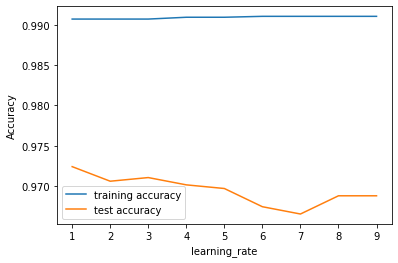

In [63]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [64]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [65]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [66]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [67]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.988
Multi-layer Perceptron : Accuracy on test Data: 0.969

Multi-layer Perceptron : f1_score on training Data: 0.990
Multi-layer Perceptron : f1_score on test Data: 0.990

Multi-layer Perceptron : Recall on training Data: 0.992
Multi-layer Perceptron : Recall on test Data: 0.981

Multi-layer Perceptron : precision on training Data: 0.987
Multi-layer Perceptron : precision on test Data: 0.964


In [68]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [69]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [70]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.960,0.964,0.991,0.993
5,Random Forest,0.968,0.971,0.995,0.988
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,Multi-layer Perceptron,0.969,0.972,0.992,0.987


In [71]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [72]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Multi-layer Perceptron,0.969,0.972,0.992,0.987
3,Random Forest,0.968,0.971,0.995,0.988
4,Support Vector Machine,0.964,0.968,0.980,0.965
5,Decision Tree,0.960,0.964,0.991,0.993
6,K-Nearest Neighbors,0.956,0.961,0.991,0.989
7,Logistic Regression,0.934,0.941,0.943,0.927
8,Naive Bayes Classifier,0.605,0.454,0.292,0.997


## Storing Best Model

In [73]:
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [74]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

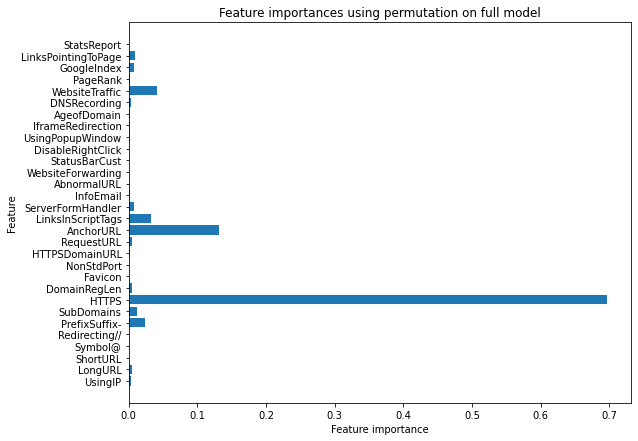

In [75]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.


<h1>BUILDING GUI</h1>

In [76]:
#pip install whois

In [77]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
#from googlesearch import search
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features


In [87]:
import webbrowser
from colorama import Fore, Back, Style
  

def gui(URL):
    instance=FeatureExtraction(URL)
    #print(instance.getFeaturesList())
    x=instance.getFeaturesList()
    features = np.array(x)
    new = features.reshape(1,-1)
    prediction=gbc.predict(new)
    if prediction==1:
        webbrowser.open(URL)
        return "Safe Website"
    else:
        return "Unsafe Website - Proceed at your own risk"
    

it1=gr.Interface(fn=gui,inputs=gr.Textbox(placeholder="Enter URL here...",label="URL"),outputs=gr.Textbox(placeholder="Waiting for Result...",label="RESULT"),allow_flagging="never",title="STRIKE",description="<h3><center>A URL phishing tool made using machine learning algorithms and gradio library.</center></h3>",article="MADE BY:-<br>MITHUL CHANDER - PES2UG20CS198<br>NIRAV ANTONY - PES2UG20CS227<br>NISHANTH PATRI - PES2UG20CS229<br>NITHANTH SAWKAR - PES2UG20CS230",examples=["https://www.kaggle.com/datasets/eswarchandt/phishing-website-detector","g00gle.com"])
it1.launch(share=False)

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1c2ca1c8d30>, 'http://127.0.0.1:7866/', None)

In [79]:
# import webbrowser
# import gradio as gr
# def update(name):
#     return f"Welcome to Gradio, {name}!"

# def go_to(url):
#     webbrowser.open(url)
    

# with gr.Blocks() as demo:
#     gr.Markdown("<center><h1>STRIKE<h1></center>")
#     gr.Markdown("<h3><center>A URL phishing tool made using machine learning algorithms and gradio library.</center></h3>")
#     with gr.Row():
#         inp = gr.Textbox(placeholder="Enter URL ...")
#         out = gr.Textbox()
#     btn1 = gr.Button("Run")
#     btn2 = gr.Button("Go to")
#     btn1.click(fn=update, inputs=inp, outputs=out)
#     btn2.click(fn=go_to("abc"), inputs=inp, outputs=out)

# demo.launch()